# SC1015 Mini-Project

Group: 2, FCEE

Lee Heng Sheng Brandon, U2322900C \
Alan Lee Leman, U2321753B \
Wee Zi Hao, U2323380H

### Final Attribute Information

> 1. `age`: age in years (Numerical)
2. `sex`: 0 = female; 1 = male (Categorical)
3. `cp` changed to `chest_pain`: Chest pain type (4 values) (Categorical)
4. `trestbps` changed to `blood_pressure`: Resting blood pressure (in mm Hg on admission to the hospital) (Numerical)
5. `chol` changed to `cholesterol`: Serum cholesterol in mg/dl (serum cholestoral in mg/dl) (Numerical)
6. `fbs` changed to `fasting_blood_sugar`: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) (Categorical)
7. `restecg` changed to `resting_ecg_result`: Resting electrocardiographic results (values 0,1,2) (Categorical)
8. `thalach` changed to `max_heart_rate`: Maximum heart rate achieved (in bpm) (Numerical)
9. `exang` changed to `exercise_induced_angina`: Exercise induced angina (0 = no; 1 = yes) (Categorical)
10. `oldpeak` changed to `st_depression`: ST depression induced by exercise relative to rest (Numerical)
11. `new_st_depression`: The presence of ST depression induced by exercise relative to rest (0 = no; 1 = yes) (Categorical)
12. `slope`: The slope of the peak exercise ST segment (0, 1, 2) (Categorical)
13. `ca` changed to `num_affected_vessels`: Number of major vessels (0-3) colored by fluoroscopy (Categorical)
14. `thal` changed to `defect_type`: 1 = normal; 2 = fixed defect; 3 = reversable defect (Categorical)
15. `target` changed to `heart_disease`: 0 = no heart disease; 1 = heart disease (Categorical)

### Essential Libraries

Let us begin by importing the essential Python Libraries for Data Extraction and Cleaning.

> NumPy : Library for Numeric Computations in Python \
Pandas : Library for Data Acquisition and Preparation \
Matplotlib : Low-level library for Data Visualization \
Seaborn : Higher-level library for Data Visualization 

In [57]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,ConfusionMatrixDisplay,confusion_matrix
from sklearn.tree import plot_tree

### Import the Dataset

We will be importing our clean_data.csv dataset that we previously saved.\
Dataset is a cleaned version of [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset). By David Lapp. 


In [58]:
# Importing our dataset
clean_data = pd.read_csv("datasets\clean_data.csv")

print("Data dimensions:", clean_data.shape)

clean_data

Data dimensions: (1000, 15)


age  sex  chest_pain  blood_pressure  cholesterol  fasting_blood_sugar  \
0     52    1           0             125          212                    0   
1     53    1           0             140          203                    1   
2     70    1           0             145          174                    0   
3     61    1           0             148          203                    0   
4     62    0           0             138          294                    1   
..   ...  ...         ...             ...          ...                  ...   
995   59    1           1             140          221                    0   
996   60    1           0             125          258                    0   
997   47    1           0             110          275                    0   
998   50    0           0             110          254                    0   
999   54    1           0             120          188                    0   

     resting_ecg_result  max_heart_rate  exercise_induced_angina  \
0                     1             168                        0   
1                     0             155                        1   
2                     1             125                        1   
3                     1             161                        0   
4                     1             106                        0   
..                  ...             ...                      ...   
995                   1             164                        1   
996                   0             141                        1   
997                   0             118                        1   
998                   0             159                        0   
999                   1             113                        0   

     st_depression  new_st_depression  slope  num_affected_vessels  \
0              1.0                  1      2                     2   
1              3.1                  1      0                     0   
2              2.6                  1      0                     0   
3              0.0                  0      2                     1   
4              1.9                  1      1                     3   
..             ...                ...    ...                   ...   
995            0.0                  0      2                     0   
996            2.8                  1      1                     1   
997            1.0                  1      1                     1   
998            0.0                  0      2                     0   
999            1.4                  1      1                     1   

     defect_type  heart_disease  
0              3              0  
1              3              0  
2              3              0  
3              3              0  
4              2              0  
..           ...            ...  
995            2              1  
996            3              0  
997            2              0  
998            2              1  
999            3              0  

[1000 rows x 15 columns]

In [59]:
# Make a list of numerical and categorical variables
cat_var = ["sex", "chest_pain", "fasting_blood_sugar", "resting_ecg_result", "exercise_induced_angina", "new_st_depression", 
           "slope", "num_affected_vessels", "defect_type", "heart_disease"]
num_var = [var for var in clean_data.columns if var not in cat_var]

### RANDOM FOREST TREE

We use a random forest to check if predictor affects our target (more reliable compared to decision trees which are inaccurate)
Tree-based models are more forgiving on outliers than decision trees, as such we can use pre processed data to work with

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_data[num_var], clean_data["heart_disease"],
                                                    test_size = 0.2, random_state = 42)

Max depth not too high or it will overfit


We use oob score as our test data(data not used in bootstrap data) as it is not seen by the bagging algorithm(data that we used to train) and thus will give a better classification accuracy of our regressor

In [61]:
#Create random forest
randomforest = RandomForestClassifier(max_depth = 25,random_state = 0,oob_score = True)
randomforest.fit(X_train, y_train)

# Access the OOB Score
oob_score = randomforest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

predictions = randomforest.predict(clean_data[num_var])
# Evaluating the model
mse = mean_squared_error(clean_data["heart_disease"], predictions)
print(f'Mean Squared Error: {mse}')


Out-of-Bag Score: 0.995
Mean Squared Error: 0.0


Plot the first 2 trees (Need more research on optimal tree count as 100 might be too many), taking too long to show

In [62]:
for tree in range(2):
    plt.figure(figsize=(200, 100))
    plot_tree(randomforest.estimators_[tree], feature_names=clean_data[num_var].columns.tolist(), filled=True, rounded=True, fontsize=20)
    plt.show()

We can show how accurate our forest is using a confusion matrix

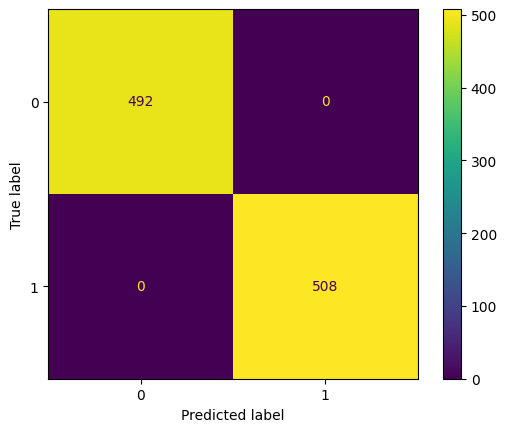

In [63]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(clean_data["heart_disease"],predictions)).plot()